### LSE Data Analytics Online Career Accelerator 
# Course 301: Advanced Analytics for Organisational Impact

## Practical activity: Finding the return for S&P 500 stocks

**This is the solution to the activity.**

As you have learned so far, CAPM describes the relationship between systematic risk and expected return for assets, primarily stocks. Using the CAPM, you can – given that investment’s characteristics, which are often values to plug into an equation or model – find the expected return of an investment. 

Yuki has started a position as a data analyst at a trusted investment bank. She’s been tasked with finding the expected returns of two of the top S&P 500 listed companies: Microsoft and Tesla. The bank's clientele want to know which of the two companies has stronger expected stock returns based on historical data, namely 2020 and 2021. 

In this activity you will use CAPM to help Yuki find the expected returns for Microsoft (`MSFT`) and Tesla Inc. (`TSLA`), based on data from 2020 and 2021. You will retrieve the historical data from Yahoo! Finance and find the variables for the CAPM equation, including:

- the current average excess annual return of the US stocks on the S&P 500 (SPY)
- the return on 10-year US Treasury bonds 
- the beta value for each stock. (Hint: You will need to find the first two values online.)

After calculating the CAPM of each stock, make a statement on which has better-expected returns and which has a lower level of volatility.

## 1. Prepare your workstation

In [23]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import datetime
import time

from sklearn.linear_model import LinearRegression
from pandas_datareader import data as web
import yfinance as yf  
yf.pdr_override()

# LinearRegression:
from sklearn.linear_model import LinearRegression

# Ignore warnings:
import warnings
warnings.filterwarnings('ignore')

## 2. Set the start and end date

In [24]:
# Specify the start and end dates.
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,1,1)

## 3 Get the data

In [27]:
# Pull data for SPY.
df_spy = web.get_data_yahoo('SPY', start='2021-01-01', end='2022-01-01')

# View the output.
df_spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,354.197388,110210800
2021-01-05,368.100006,372.500000,368.049988,371.329987,356.636841,66426200
2021-01-06,369.709991,376.980011,369.119995,373.549988,358.769073,107997700
2021-01-07,376.100006,379.899994,375.910004,379.100006,364.099487,68766800
2021-01-08,380.589996,381.489990,377.100006,381.260010,366.173981,71677200


In [28]:
# Pull data for TSLA.
df_tesla = web.get_data_yahoo('TSLA', start='2021-01-01', end='2022-01-01')

# View the output.
df_tesla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


## 4. Visualise the data

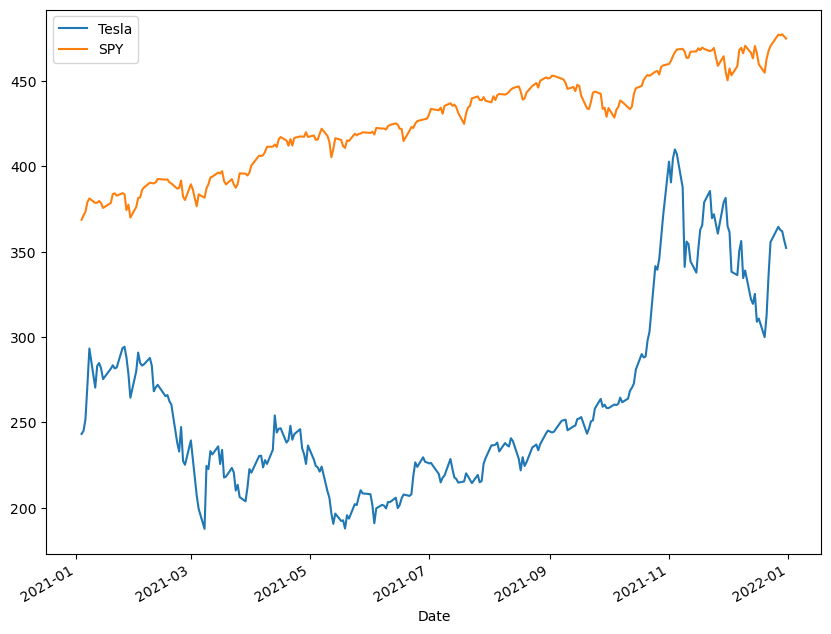

In [29]:
# Plot the data (Close) for both stocks.
df_tesla['Close'].plot(label = 'Tesla', figsize=(10, 8))
df_spy['Close'].plot(label = 'SPY')
plt.legend()

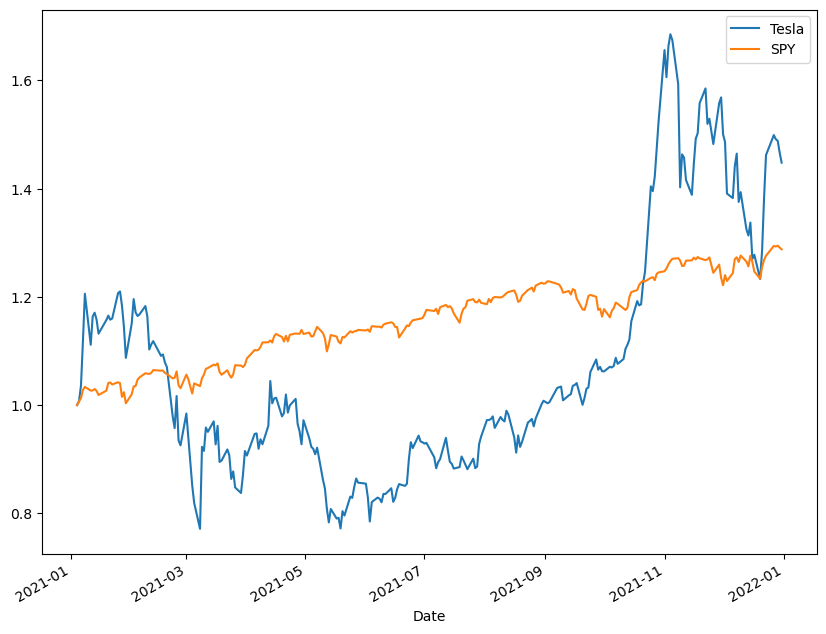

In [30]:
# Visualise the cummulative sum of the closing prices.
df_tesla['Cumu'] = df_tesla['Close']/df_tesla['Close'].iloc[0] 
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0]

df_tesla['Cumu'].plot(label = 'Tesla', figsize=(10, 8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

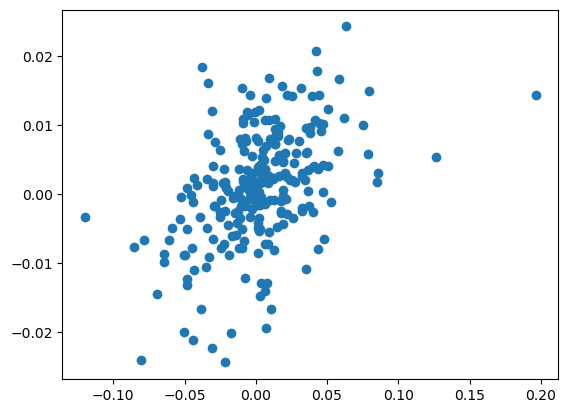

In [31]:
# Visualise the daily returns. 
df_tesla['daily_ret'] = df_tesla['Close'].pct_change(1)
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)
plt.scatter(df_tesla['daily_ret'],df_spy['daily_ret'])

# 5. Analyse the data

In [32]:
# Calculate the daily prices and daily returns.
daily_prices = pd.concat([df_tesla['Close'], df_spy['Close']], axis=1)
daily_prices.columns = ['Tesla', 'SPY']

# View the output.
print(daily_prices.head())

                 Tesla         SPY
Date                              
2021-01-04  243.256668  368.790009
2021-01-05  245.036667  371.329987
2021-01-06  251.993332  373.549988
2021-01-07  272.013336  379.100006
2021-01-08  293.339996  381.260010


In [33]:
# Calculate the daily prices and daily returns.
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0) 

# View the output.
print(clean_daily_returns.head())

               Tesla       SPY
Date                          
2021-01-05  0.007317  0.006887
2021-01-06  0.028390  0.005979
2021-01-07  0.079447  0.014857
2021-01-08  0.078403  0.005698
2021-01-11 -0.078214 -0.006741


# 6. Fit the model

In [34]:
# Set the variables.
X = clean_daily_returns['SPY'].values.reshape(-1, 1)
y = clean_daily_returns['Tesla'].values.reshape(-1, 1)

In [35]:
# Fit the model.
lr = LinearRegression()

lr.fit(X, y)

LinearRegression()

In [36]:
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

Intercept value:  [6.39030107e-05]
Coefficient value:  [[1.91635999]]


In [37]:
# x coef: 1.34497477
# Constant coef: 0.00489288.
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏.
y_pred = lr.intercept_ +  lr.coef_ * X  
y_pred

array([[ 0.0132625 ],
       [ 0.01152089],
       [ 0.02853622],
       [ 0.01098278],
       [-0.01285395],
       [ 0.00046867],
       [ 0.00522462],
       [-0.00664715],
       [-0.01391145],
       [ 0.01511109],
       [ 0.02658382],
       [ 0.00181096],
       [-0.00671889],
       [ 0.00762168],
       [-0.0029274 ],
       [-0.04677282],
       [ 0.01654498],
       [-0.03830084],
       [ 0.03196269],
       [ 0.02716166],
       [ 0.00157076],
       [ 0.02184469],
       [ 0.00760642],
       [ 0.01390374],
       [-0.00121205],
       [-0.00077096],
       [ 0.00315895],
       [ 0.00953031],
       [-0.00159567],
       [ 0.00050368],
       [-0.00809213],
       [-0.00332034],
       [-0.01467619],
       [ 0.00239109],
       [ 0.0211809 ],
       [-0.04611228],
       [-0.00981037],
       [ 0.04651685],
       [-0.01488987],
       [-0.02531964],
       [-0.02365069],
       [ 0.03531838],
       [-0.0094772 ],
       [ 0.02742476],
       [ 0.01199245],
       [ 0

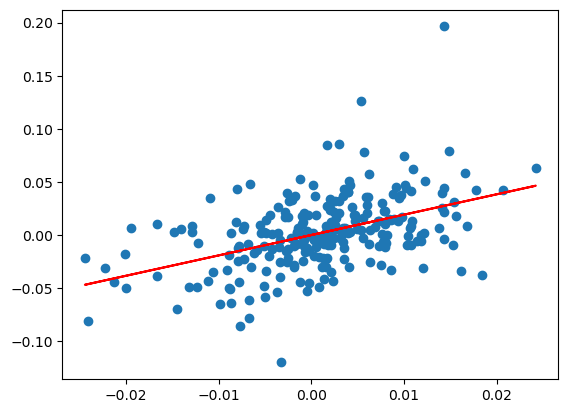

In [38]:
# Visualise the output.
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

## 7. Compare Micrsoft and Tesla

In [42]:
df_msoft = web.get_data_yahoo('MSFT', start='2021-01-01', end='2022-01-01')
df_msoft.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,212.426895,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,212.631836,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,207.118408,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,213.012360,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,214.310211,22956200


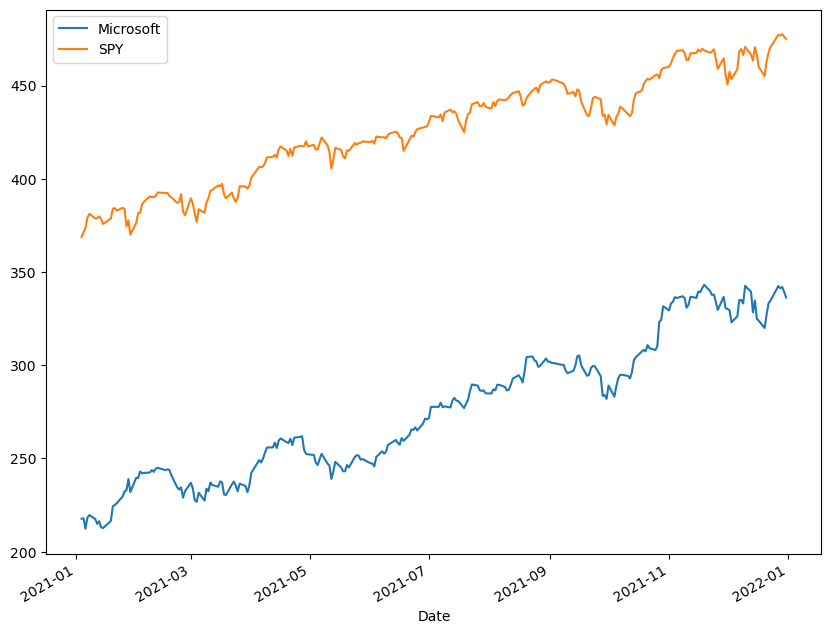

In [43]:
df_msoft['Close'].plot(label = 'Microsoft', figsize=(10, 8))
df_spy['Close'].plot(label = 'SPY')
plt.legend()

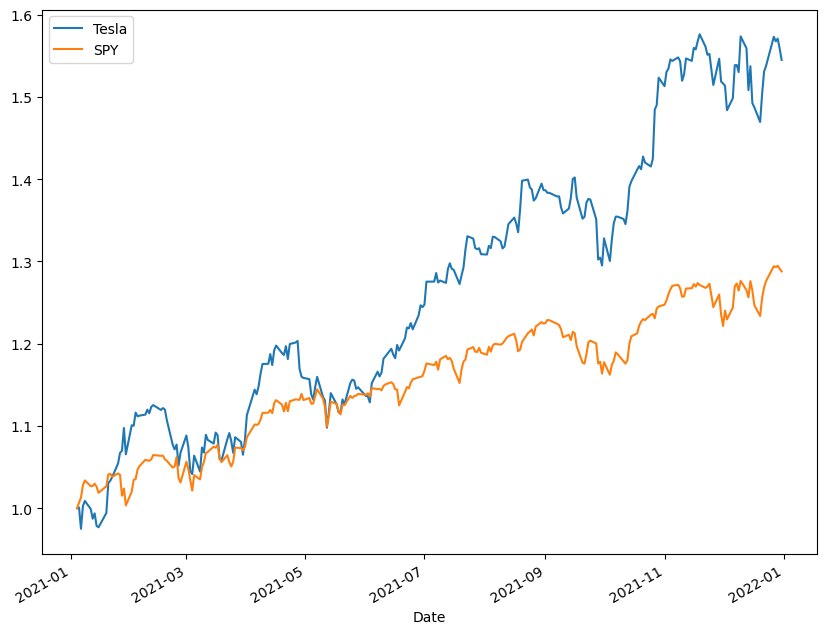

In [44]:
df_msoft['Cumu'] = df_msoft['Close']/df_msoft['Close'].iloc[0] 
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0]

df_msoft['Cumu'].plot(label = 'Tesla', figsize=(10, 8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

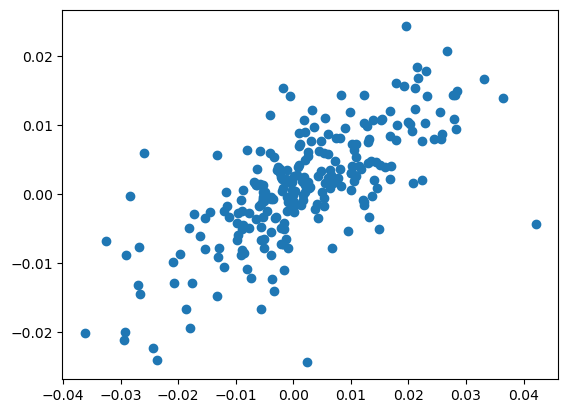

In [45]:
df_msoft['daily_ret'] = df_msoft['Close'].pct_change(1)
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)
plt.scatter(df_msoft['daily_ret'],df_spy['daily_ret'])

In [46]:
daily_prices = pd.concat([df_msoft['Close'], df_spy['Close']], axis=1)
daily_prices.columns = ['Microsoft', 'SPY']

print(daily_prices.head())

             Microsoft         SPY
Date                              
2021-01-04  217.690002  368.790009
2021-01-05  217.899994  371.329987
2021-01-06  212.250000  373.549988
2021-01-07  218.289993  379.100006
2021-01-08  219.619995  381.260010


In [47]:
daily_returns = daily_prices.pct_change(1)
print(daily_returns.head())

            Microsoft       SPY
Date                           
2021-01-04        NaN       NaN
2021-01-05   0.000965  0.006887
2021-01-06  -0.025929  0.005979
2021-01-07   0.028457  0.014857
2021-01-08   0.006093  0.005698


In [48]:
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0) 
print(clean_daily_returns.head())

            Microsoft       SPY
Date                           
2021-01-05   0.000965  0.006887
2021-01-06  -0.025929  0.005979
2021-01-07   0.028457  0.014857
2021-01-08   0.006093  0.005698
2021-01-11  -0.009699 -0.006741


In [49]:
X = clean_daily_returns['SPY'].values.reshape(-1, 1)
y = clean_daily_returns['Microsoft'].values.reshape(-1, 1)

In [50]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [51]:
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

Intercept value:  [0.00062948]
Coefficient value:  [[1.14361935]]


In [52]:
# x coef: 1.14398066
# Constant coef: 0.00069205
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred =  lr.coef_ * X + lr.intercept_
y_pred

array([[ 8.50596061e-03],
       [ 7.46662155e-03],
       [ 1.76208008e-02],
       [ 7.14549492e-03],
       [-7.07946069e-03],
       [ 8.71032464e-04],
       [ 3.70922079e-03],
       [-3.37545414e-03],
       [-7.71054652e-03],
       [ 9.60913226e-03],
       [ 1.64556745e-02],
       [ 1.67206548e-03],
       [-3.41826699e-03],
       [ 5.13970689e-03],
       [-1.15563216e-03],
       [-2.73211064e-02],
       [ 1.04648343e-02],
       [-2.22653114e-02],
       [ 1.96656045e-02],
       [ 1.68005125e-02],
       [ 1.52872273e-03],
       [ 1.36275238e-02],
       [ 5.13060156e-03],
       [ 8.88862856e-03],
       [-1.31967600e-04],
       [ 1.31257436e-04],
       [ 2.47649879e-03],
       [ 6.27871142e-03],
       [-3.60897933e-04],
       [ 8.91921355e-04],
       [-4.23777022e-03],
       [-1.39012701e-03],
       [-8.16691713e-03],
       [ 2.01826585e-03],
       [ 1.32313932e-02],
       [-2.69269191e-02],
       [-5.26315801e-03],
       [ 2.83510373e-02],
       [-8.2

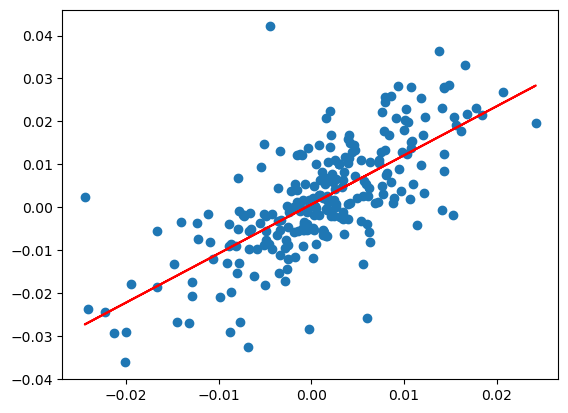

In [53]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')